Implement hierarchical clustering. 

Start the bottom of the hierarchy with all point (or at least 5000 sampled) and build the hierarchy by repeatedly "joining the closest" clusters with avg_dist or single_dist criteria up to one big cluster (full hierarchy). 

Then decide how to cut it for K=2 or K=5 or K=10 clusters and evaluate. Run on moons dataset.

Look into Kruskals algorithm to get an MST!!

otherwise, priority queue

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
df = pd.read_csv('moons.csv')

# truncate to 10 rows to begin
df = df[:500]

In [111]:
df.iloc[0]

Xmoons_X1   -0.378142
Xmoons_X2    0.940750
Name: 0, dtype: float64

In [112]:
# distance:
def euclidean_distance(x, y):
    return np.linalg.norm(x - y)

#
def kruskals_algorithm(data, k):
    # Initialize the MST
    mst = []

    # Initialize the clusters (each point is its own cluster)
    clusters = []
    for i in range(len(data)):
        clusters.append([i])
    
    # Initialize the edges
    edges = []
    for i in range(len(data)):
        for j in range(i+1, len(data)):
            edges.append((i, j, euclidean_distance(data.iloc[i], data.iloc[j])))
    edges = sorted(edges, key=lambda x: x[2])

    # Kruskal's algorithm
    while len(mst) < len(data) - k:
        edge = edges.pop(0)
        c1 = -1
        c2 = -1
        for i in range(len(clusters)):
            if edge[0] in clusters[i]:
                c1 = i
            if edge[1] in clusters[i]:
                c2 = i
        if c1 != c2:
            mst.append(edge)
            clusters[c1] = clusters[c1] + clusters[c2]
            clusters.pop(c2)
    
    # after popping, recalculate distances

    return mst


In [113]:
# sample distance between two points:
# print(euclidean_distance(df.iloc[0], df.iloc[1]))
clusters = [0,1,2]

# 3 points:
    #df.iloc[0]
    #df.iloc[1]
    #df.iloc[2]
# 3 clusters:
    #clusters[0]
    #clusters[1]
    #clusters[2]

# get min distance between all points in clusters
min_i = 0
min_dist = 1000000
for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        dist = euclidean_distance(df.iloc[clusters[i]], df.iloc[clusters[j]])
        print(dist)
        if dist < min_dist:
            min_dist = dist
    min_i = i

print(min_dist)

# merge clusters:
clusters.pop(min_i)
print(clusters)
# get min distance between all points in clusters
min_dist = 1000000
for i in range(len(clusters)):
    for j in range(i+1, len(clusters)):
        dist = euclidean_distance(df.iloc[clusters[i]], df.iloc[clusters[j]])
        print(dist)
        if dist < min_dist:
            min_dist = dist
print(min_dist)



1.5296604904704645
2.4664835023782596
1.166721766328796
1.166721766328796
[0, 1]
1.5296604904704645
1.5296604904704645


Text(0, 0.5, 'Y')

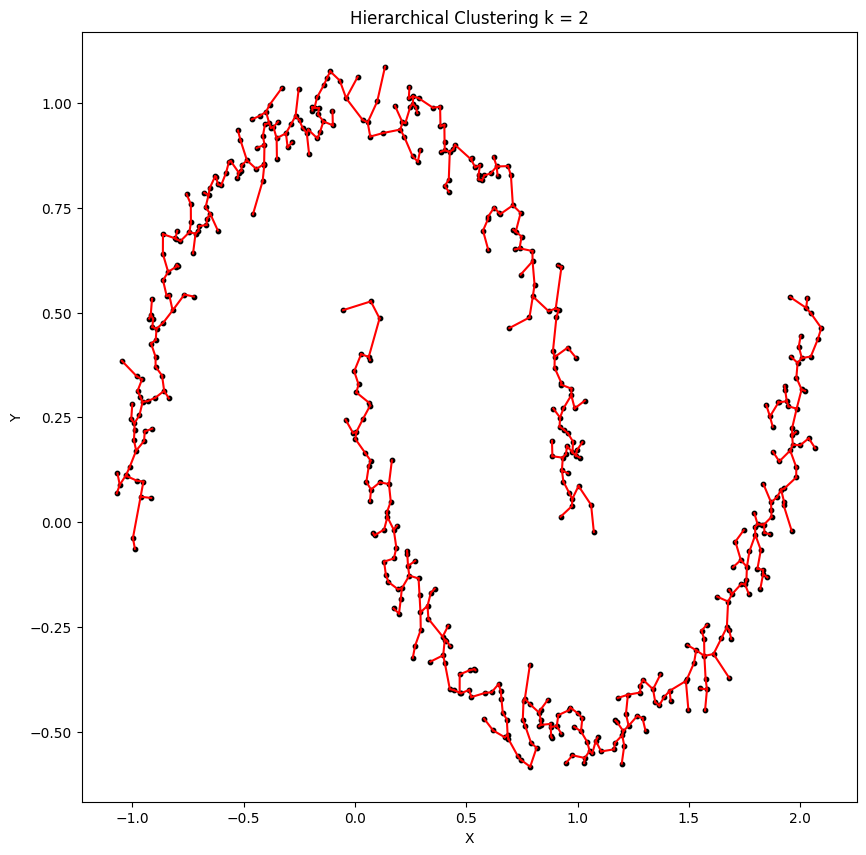

In [114]:
hierarchial_clustering = kruskals_algorithm(df, 2)
# plot the results from the algorithm, with a different color for each cluster
plt.figure(figsize=(10, 10))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='black', s=10)
for edge in hierarchial_clustering:
    plt.plot([df.iloc[edge[0], 0], df.iloc[edge[1], 0]], [df.iloc[edge[0], 1], df.iloc[edge[1], 1]], c='red')
plt.title('Hierarchical Clustering k = 2')
plt.xlabel('X')
plt.ylabel('Y')


Text(0, 0.5, 'Y')

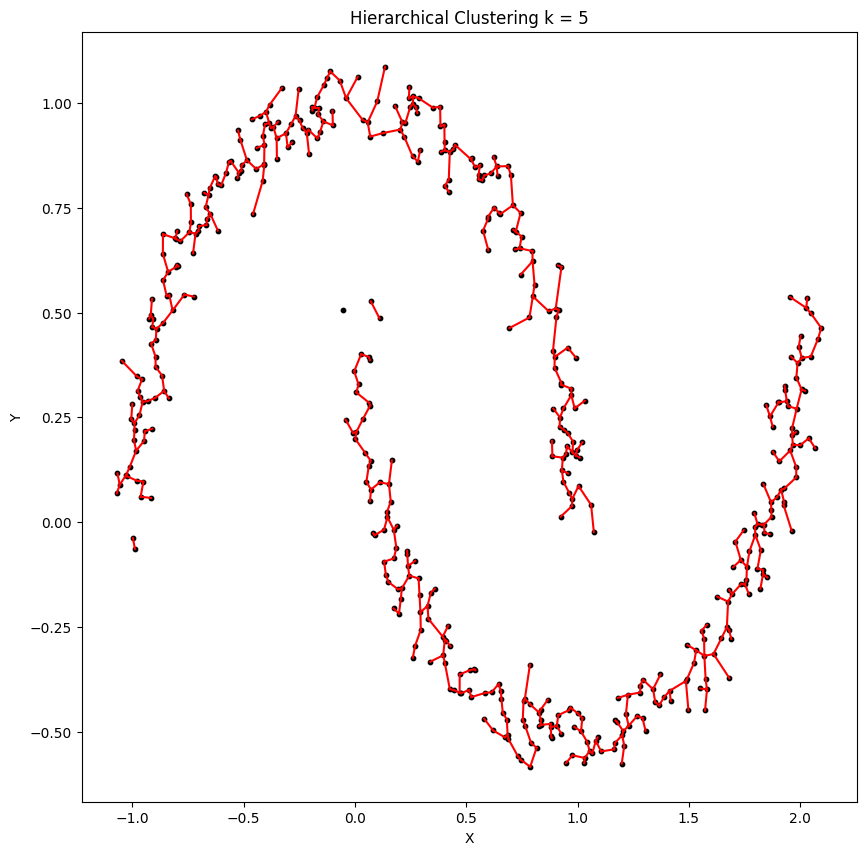

In [115]:
hierarchial_clustering = kruskals_algorithm(df, 5)
# plot the results from the algorithm, with a different color for each cluster
plt.figure(figsize=(10, 10))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c='black', s=10)
for edge in hierarchial_clustering:
    plt.plot([df.iloc[edge[0], 0], df.iloc[edge[1], 0]], [df.iloc[edge[0], 1], df.iloc[edge[1], 1]], c='red')
plt.title('Hierarchical Clustering k = 5')
plt.xlabel('X')
plt.ylabel('Y')


Text(0, 0.5, 'y')

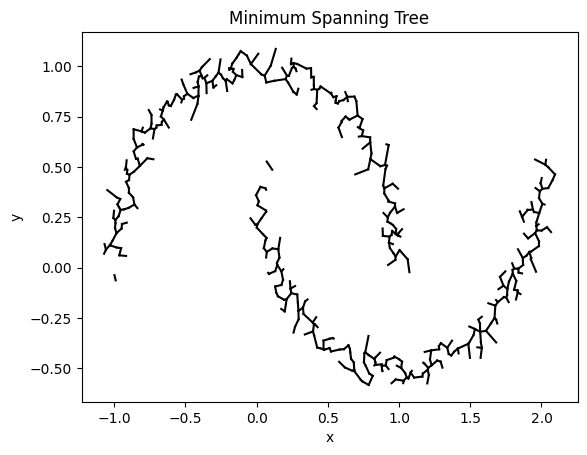

In [116]:
for edge in hierarchial_clustering:
    x1, y1 = df.iloc[edge[0]]
    x2, y2 = df.iloc[edge[1]]
    plt.plot([x1, x2], [y1, y2], 'k-')
plt.title('Minimum Spanning Tree')
plt.xlabel('x')
plt.ylabel('y')

C:\Users\koola\AppData\Local\Temp\ipykernel_52896\814285892.py:7: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = sch.linkage(distance_matrix, method='ward')


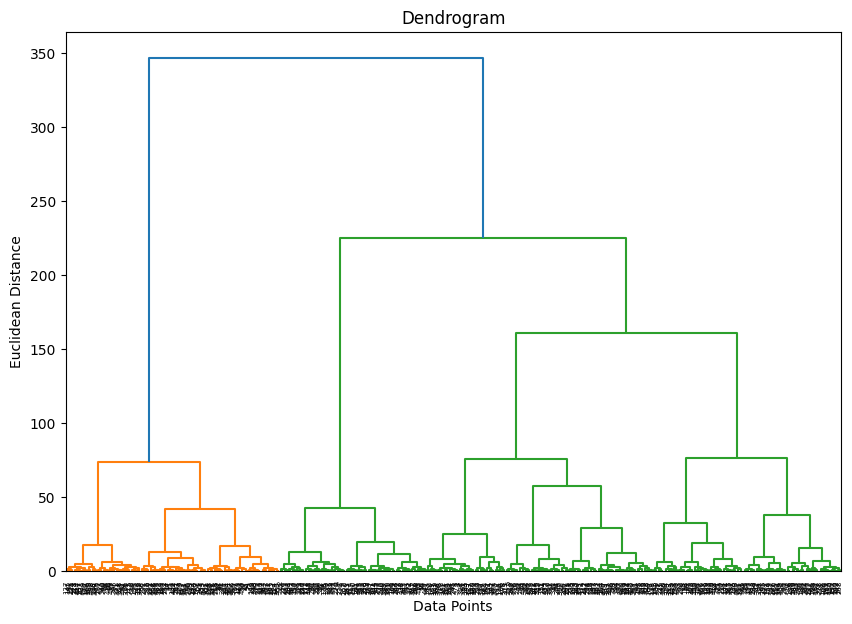

In [117]:
# create a dendogram
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist, squareform
# Compute the distance matrix
distance_matrix = squareform(pdist(df, metric='euclidean'))
# Perform hierarchical clustering
Z = sch.linkage(distance_matrix, method='ward')
# Plot the dendrogram
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()
